In [2]:
import io
import requests
from PIL import Image
import torch
import numpy
import matplotlib.pyplot as plt

from transformers import DetrFeatureExtractor, DetrForSegmentation
from transformers.models.detr.feature_extraction_detr import rgb_to_id

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

feature_extractor = DetrFeatureExtractor.from_pretrained(
    "facebook/detr-resnet-50-panoptic")
model = DetrForSegmentation.from_pretrained("facebook/detr-resnet-50-panoptic")

# prepare image for the model
inputs = feature_extractor(images=image, return_tensors="pt")

# forward pass
outputs = model(**inputs)

# use the `post_process_panoptic`
# method of `DetrFeatureExtractor` to convert to COCO format
processed_sizes = torch.as_tensor(
    inputs["pixel_values"].shape[-2:]).unsqueeze(0)
result = feature_extractor.post_process_panoptic(outputs, processed_sizes)[0]

# the segmentation is stored in a special-format png
panoptic_seg = Image.open(io.BytesIO(result["png_string"]))
panoptic_seg = numpy.array(panoptic_seg, dtype=numpy.uint8)
# retrieve the ids corresponding to each mask
panoptic_seg_id = rgb_to_id(panoptic_seg)

/home/stachu/Projects/CV/.venv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


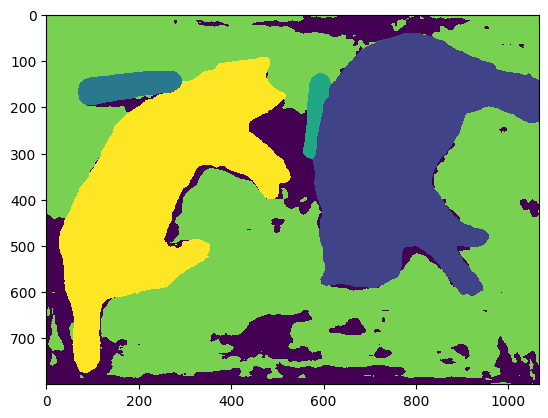

In [7]:
plt.imshow(panoptic_seg_id, interpolation='none');